In [1]:
%load_ext autoreload
%autoreload 2

In [59]:
import sys
import re
import pytz
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from astropy import table
from astropy import units as u
from astropy.io import fits
from skipper import observe, qa

In [55]:
from shapely import geometry
from descartes.patch import PolygonPatch
from astropy import units as u

In [56]:
g09edges = np.loadtxt('../data/g09edge.dat')
poly_g09 = geometry.Polygon(g09edges)  
print('The GAMA09 field area is: ' + str(poly_g09.area))
print('Fraction of the entire Merian Survey is: '+str(100*poly_g09.area/800))

The GAMA09 field area is: 140.6957220611181
Fraction of the entire Merian Survey is: 17.58696525763976


In [4]:
sys.path.append('../scripts/')
import sigjson_s2021a
import make_pointings

In [9]:
tele = sigjson_s2021a.load_telemetry('/Users/kadofong/Downloads/tele20210314.csv')
mastercat = sigjson_s2021a.load_mastercat()

In [52]:
exp_exposures = tele.query('(exptime>599.)&(object!="G09")').shape[0]
has_observed = np.in1d(mastercat['object'], tele['object'])

ocat = observe.ObsCatalog(comment='--', proposer='Leathaud', propid='2020B-\
0288', seqid='S2021A')

# \\ build is_queued <- previously observed objects                         
is_queued = pd.DataFrame ( index=mastercat.index,
                           columns=['is_queued','qstamp','has_priority'])
is_queued['is_queued'] = False
is_queued.loc[has_observed, 'is_queued'] = True

In [79]:
fmt = '%Y/%m/%d %I:%M %p'
et = pytz.timezone("America/New_York")

In [85]:
days = np.arange(1,31)
ostart_a = []
for day in days:
    obs_start, twibeg = ctio.get_sunriseset ( 2021, 3, day )
    ostart_a.append(obs_start)


In [97]:
osa = np.zeros_like(days, dtype=float)
for ix in range(len(ostart_a)):
    ox = ostart_a[ix].hour + ostart_a[ix].minute / 60.
    if ox > 12.:
        ox -= 24.
    osa[ix] = ox
    print(ostart_a[ix].strftime(fmt))

2021/03/02 12:19 AM
2021/03/03 12:18 AM
2021/03/04 12:17 AM
2021/03/05 12:15 AM
2021/03/06 12:14 AM
2021/03/07 12:13 AM
2021/03/08 12:12 AM
2021/03/09 12:10 AM
2021/03/10 12:09 AM
2021/03/11 12:08 AM
2021/03/12 12:07 AM
2021/03/13 12:05 AM
2021/03/14 12:04 AM
2021/03/15 12:03 AM
2021/03/16 12:02 AM
2021/03/17 12:00 AM
2021/03/17 11:59 PM
2021/03/18 11:58 PM
2021/03/19 11:57 PM
2021/03/20 11:55 PM
2021/03/21 11:54 PM
2021/03/22 11:53 PM
2021/03/23 11:52 PM
2021/03/24 11:50 PM
2021/03/25 11:49 PM
2021/03/26 11:48 PM
2021/03/27 11:47 PM
2021/03/28 11:46 PM
2021/03/29 11:44 PM
2021/03/30 11:43 PM


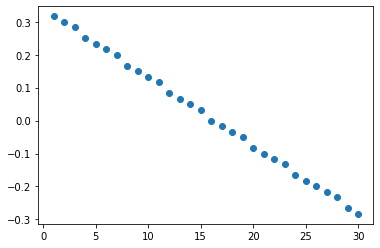

In [96]:
plt.scatter(days, osa )

In [80]:
is_queued_tmrw = is_queued.copy ()
for day in [15,16,17]:
    # \\ Define the observatory site -- default is CTIO                         
    ctio = observe.ObservingSite ()
    priorities = {'COSMOS':0, 'GAMA':1}

    obs_start, twibeg = ctio.get_sunriseset ( 2021, 3, day )
    obs_end = obs_start + 0.5*(twibeg-obs_start)
    
    print(f"obsStart: {obs_start.astimezone(ctio.timezone).strftime(fmt)} Santi\
ago")
    print(f"          {obs_start.astimezone(et).strftime(fmt)} ET")
    print(f"          {obs_start.strftime(fmt)} UTC")
    print(f"obsEnd:   {obs_end.astimezone(ctio.timezone).strftime(fmt)} Santiag\
o")
    print(f"          {obs_end.astimezone(et).strftime(fmt)} ET")
    print(f"          {obs_end.strftime(fmt)} UTC")
    

    is_queued_tmrw = ocat.plan_night ( obs_start, ctio, catalog=mastercat, obs_end=obs_end,
                                     is_queued=is_queued_tmrw,
                                     maxairmass=1.5, object_priority=priorities, save=False)
    
    daystamp = f'202103{day}'
    is_today = is_queued_tmrw.apply(lambda x: len(re.findall(daystamp,str(x['qstamp']))), axis=1) > 0
    unqueue = is_queued_tmrw.loc[is_today].sort_values('qstamp')[26:].index
    is_queued_tmrw.loc[unqueue, 'is_queued'] = False

obsStart: 2021/03/15 09:02 PM Santiago
          2021/03/15 08:02 PM ET
          2021/03/16 12:02 AM UTC
obsEnd:   2021/03/16 01:52 AM Santiago
          2021/03/16 12:52 AM ET
          2021/03/16 04:52 AM UTC
2021-03-16 04:00:00

==> 20210316_00, 3480.0000000000055s available
0.0s filled by priority=0.0 objects
3000.0s filled by priority=1.0 objects

==> 20210316_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects

==> 20210316_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects

==> 20210316_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
2021-03-16 05:30:00
2021-03-16 04:52:00

==> 20210316_04, 4319.999999999976s available
0.0s filled by priority=0.0 objects
4200.0s filled by priority=1.0 objects
obsStart: 2021/03/16 09:00 PM Santiago
          2021/03/16 08:00 PM ET
          2021/03/17 12:00 AM UTC
obsEnd:   2021/03/17 01:51 AM Santiago
     

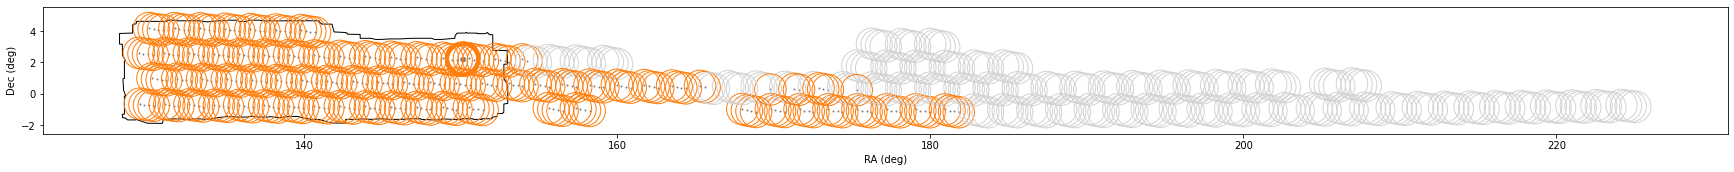

In [72]:
tq = mastercat.loc[is_queued_tmrw.is_queued]
fov_radius = (3.18/np.pi)**0.5
plt.figure(figsize=(24,4))
ax = plt.subplot(111, aspect='equal')
patch1 = PolygonPatch(poly_g09, edgecolor='k',facecolor='none',lw=1)
ax.add_patch(patch1)


for name,row in mastercat.iterrows():
    qrow = is_queued_tmrw.loc[name]
    if qrow.is_queued:
        ec='C1'
    else:
        ec='lightgray'
    patch = patches.Circle ( (row.RA, row.dec), fov_radius, ec=ec, #plt.cm.viridis((hr+5)/10.), 
                            fc='None')
    
    ax.add_patch(patch)

        
ax.scatter(tq.RA, tq.dec, s=1, color='grey')
plt.tight_layout ()
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.savefig('/Users/kadofong/Downloads/maxrate.png')